In [1]:
from astropy import constants as const
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind',10)
sns.set_context('notebook')
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 

In [2]:
h18 = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyu18.csv')
h18.rename(columns={'Teff':'Yu_Teff', 'Teff_err':'Yu_Teff_err'},inplace=True)
h18.head(0)

,KICID,kepmag_x,Length_Quarters,Length_days,numax,numax_err,dnu,dnu_err,amplitude,err.2_x,...,Ebv,Aks,Aj,Ah,H17_Ag,L,L_err,Mbol,Mbol_err,Z


In [3]:
len(h18)

5576

In [4]:
check = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyuxapokasc2.csv')
len(check)

1637

In [5]:
a2 = pd.read_csv('/home/oliver/PhD/Catalogues/APOKASC-2/APOKASC2_Table5.txt',sep='\t')
a2.rename(columns={'KIC':'KICID',
                   'S Teff':'Teff_err',
                   'Nmax':'A_numax',
                   'S Nmax':'A_numax_err',
                   'Dnu':'A_dnu',
                   'S Dnu':'A_dnu_err',
                   'Fdnu':'A_fdnu',
                   'S Fdnu':'A_fdnu_err'}, inplace=True)

In [8]:
df = pd.merge(h18, a2, on='KICID', how='left')
columns=['KICID','numax', 'numax_err', 'dnu', 'dnu_err','Yu_Teff','Yu_Teff_err','ra','dec','parallax','parallax_error',
        'GAIAmag','Ag','e_GAIAmag','Kmag','e_Kmag','ccd','b17','Ebv','Aks','Z', 'Teff','Teff_err',
         'M_Clump','M_Clump_err','R_Clump','R_Clump_err',
        'A_numax','A_numax_err','A_dnu','A_dnu_err','A_fdnu','A_fdnu_err','[Fe/H]','Log Age']
df = df[columns].dropna().reset_index(drop=True)
df.drop(df[df.Teff == '...'].index.values, inplace=True)
df.drop(df[df.A_fdnu == '...'].index.values, inplace=True)

In [17]:
df['A_numax'] = df.A_numax.astype(float)
df['A_numax_err'] = df.A_numax_err.astype(float)
df['A_dnu'] = df.A_dnu.astype(float)
df['A_dnu_err'] = df.A_dnu_err.astype(float)
df['A_fdnu'] = df.A_fdnu.astype(float)
df['A_fdnu_err'] = df.A_fdnu_err.astype(float)
df['Log Age'] = df['Log Age'].astype(float)

In [11]:
df['Teff'] = df.Teff.astype(float)
df['Teff_err'] = df.Teff_err.astype(float)

In [12]:
len(df)

1637

In [13]:
df.to_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/rcxyuxapokasc2.csv',index=False)

## Lets do some quick comparisons for these stars to the Yu values

In [ ]:
matplotlib.rcParams['text.usetex']=False

sns.jointplot(df.numax, df.A_numax)
plt.show()


In [ ]:
sns.jointplot(df.dnu, df.A_dnu)
plt.show()

In [ ]:
plt.scatter(df.Teff, df.A_Teff)
plt.plot(df.Teff, df.Teff,c='r')
plt.show()

In [16]:
df['Log Age'].values

array(['3.889', '3.639', '3.786', ..., '3.476', '3.645', '3.469'],
      dtype=object)

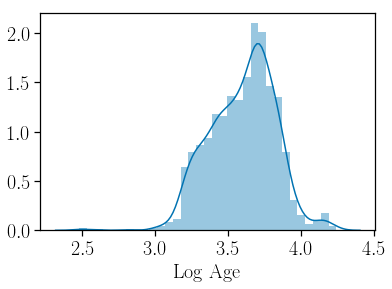

In [22]:
sns.distplot(df['Log Age'])

[Text(0.5,0,'Age (Myr?)')]

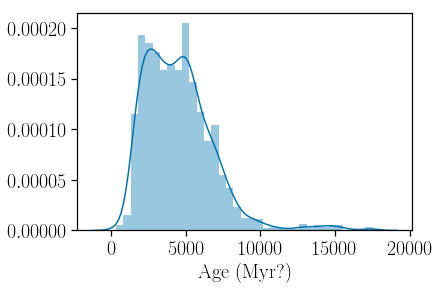

In [25]:
sns.distplot(10**(df['Log Age'])).set(xlabel='Age (Myr?)')